<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°05

## Objetivos de la clase

* Reforzar los conceptos básicos de visualización.

## Contenidos

* [Problema 01](#p1)


## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","company_sales_data.csv"))
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

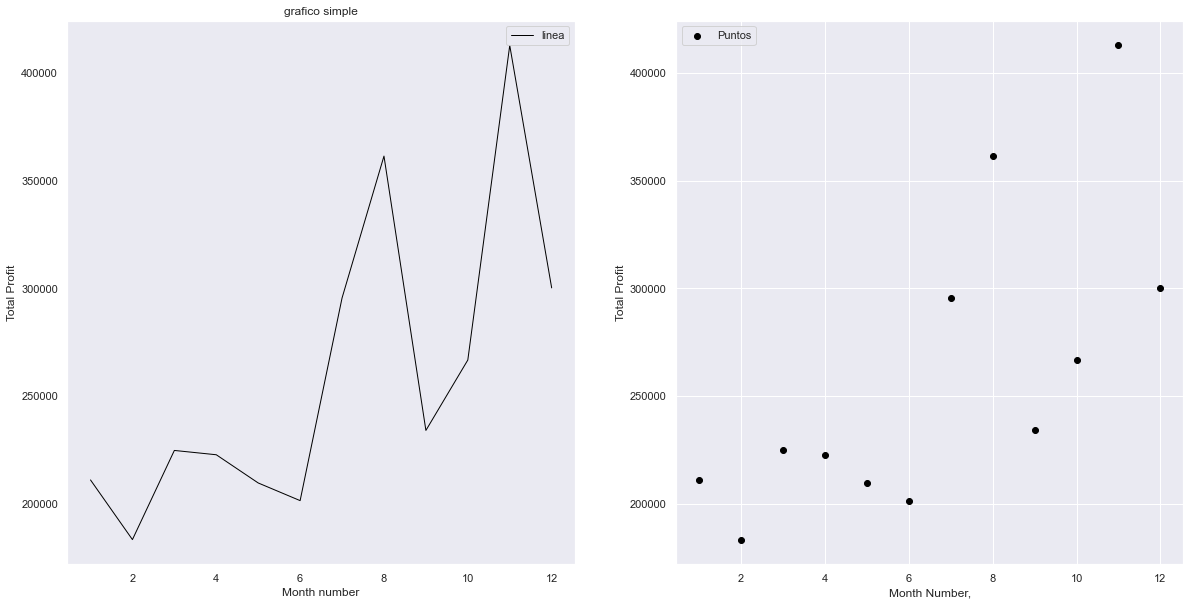

In [3]:
fig = plt.figure(figsize=(20, 10)) # ventana

#Gráfico de linea

plt.subplot(1, 2, 1) # sub-ventana
plt.plot(
    df['month_number'], # eje x
    df['total_profit'], # eje y
    label='linea', # etiquetado
    color="black", # color
    linewidth=1 # tamano de la curva
)
plt.legend() # agregar etiquetado
plt.title("grafico simple") # agregar titulo
plt.xlabel('Month number') # nombre eje x
plt.ylabel('Total Profit') # nombre eje y
plt.grid() # agregar grillado

#Gráfico de dispersión

plt.subplot(1, 2, 2) # sub-ventana
plt.scatter(
    df['month_number'], # eje x
    df['total_profit'], # eje y
    c="black", # color
    alpha=1, # intensidad color
    marker=r'o', # forma de los puntos
    label="Puntos" # etiquetdo fijando posicion
)
plt.xlabel("Month Number,")
plt.ylabel("Total Profit")
plt.legend(loc='upper left')


plt.show() # mostrar grafico 

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

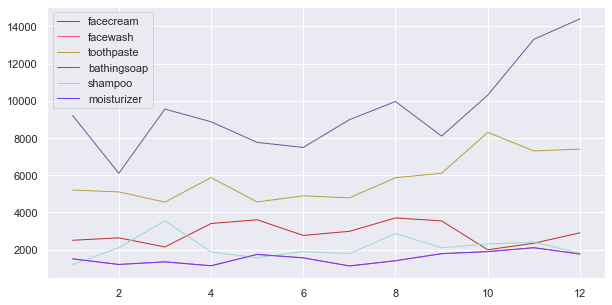

In [4]:
fig = plt.figure(figsize=(10, 5)) 
palette = [
                    '#C03028',  
                    '#F85888',  
                    '#B8A038',  
                    '#705898',  
                    '#98D8D8',  
                    '#7038F8',  
                   ]
for i in range(1,7):
    
    plt.plot(
        df['month_number'], # eje x
        df[df.columns[i]], # eje y
        label=df.columns[i], # etiquetado
        color= palette[i-1], # color
        linewidth=1 # tamano de la curva
)
    plt.legend()
    #Como observación notar que facewash y moisturizer tienen exactamente los mismos datos

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

Text(0, 0.5, 'Facewash')

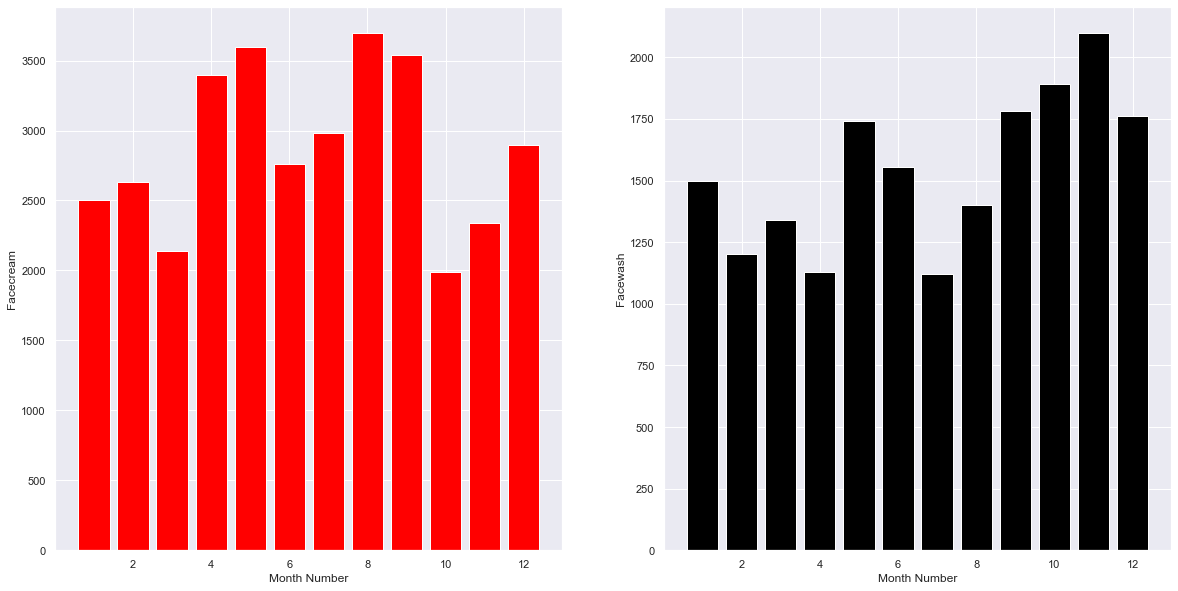

In [5]:
fig = plt.figure(figsize=(20, 10))

#Datos de Facecream

plt.subplot(1,2,1)
plt.bar(
    df['month_number'], # eje x
    df['facecream'], # eje y 
    align='center', # centrar nombre eje x
    color="red", # color 
    alpha=1 # intensidad del color
)
plt.xlabel('Month Number')
plt.ylabel('Facecream')

#Datos de Facewash

plt.subplot(1,2,2)
plt.bar(
    df['month_number'], # eje x
    df['facewash'], # eje y 
    align='center', # centrar nombre eje x
    color="black", # color 
    alpha=1 # intensidad del color
)
plt.xlabel('Month Number')
plt.ylabel('Facewash')

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

[Text(0, 0.5, 'Datos de Venta')]

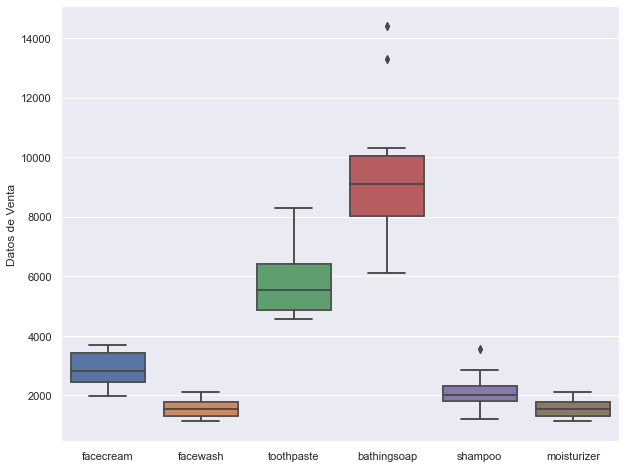

In [9]:
# Pre-format DataFrame
Productos_df = df.drop(['month_number', 'total_units', 'total_profit'], axis=1)
 
# New boxplot using df
sns.boxplot(data=Productos_df)
sns.boxplot(data=Productos_df).set(ylabel='Datos de Venta') #Label


5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

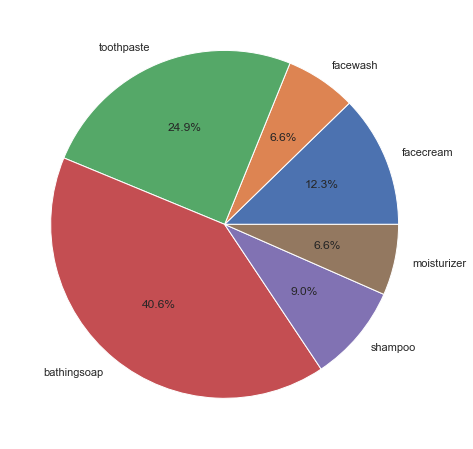

In [7]:
diccionario={} #Diccionario vacio
for i in range(1,7):
    diccionario[df.columns[i]]=df[df.columns[i]].sum() #Se calcula la suma por columanas de los datos de interes
total=pd.Series(diccionario) #Creación de serie
plt.pie(
    total,
    labels=df.drop(['month_number','total_units','total_profit'], axis=1).columns, 
    autopct='%1.1f%%'
) #Se crea el grafico circular eliminando los datos irrelevantes
plt.show()